# GPU Check

In [ ]:
import GPUtil
GPUs = GPUtil.getGPUs()
for gpu in GPUs:
  print(gpu.name, gpu.memoryTotal)

# Imports

In [ ]:
from search_eval.eval_OneShot import Eval_OS
from search_eval.optimizer.SingleImageDataset import SingleImageDataset
from search_eval.utils.common_utils import *
from search_space.search_space import SearchSpace

from nni import trace
import nni.retiarii.strategy as strategy
import nni.retiarii.serializer as serializer

from nni.retiarii.experiment.pytorch import RetiariiExperiment, RetiariiExeConfig
from nni.retiarii.evaluator.pytorch import Lightning, Trainer
from nni.retiarii.evaluator.pytorch.lightning import DataLoader
from nni.retiarii.strategy import DARTS as DartsStrategy

import torch

torch.cuda.empty_cache()
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
print('CUDA available: {}'.format(torch.cuda.is_available()))

# Strategy

In [ ]:
# Select the Search Strategy
strategy = DartsStrategy()
# strategy = strategy.DartsStrategy()
# strategy = strategy.ENAS()
# strategy = strategy.GumbelDARTS()
# strategy = strategy.RandomOneShot()

# oneshot

In [ ]:
total_iterations = 1200

resolution = 64
noise_type = 'gaussian'
noise_level = .09
phantom =       np.load(f'/home/joe/nas-for-dip/phantoms/ground_truth/{resolution}/{45}.npy')
phantom_noisy = np.load(f'/home/joe/nas-for-dip/phantoms/{noise_type}/res_{resolution}/nl_{noise_level}/p_{45}.npy')

# Create the lightning module
module = Eval_OS(
                phantom=phantom, 
                phantom_noisy=phantom_noisy,
                
                learning_rate=0.01, 
                buffer_size=100,
                patience=1000,
                weight_decay= 5e-7,

                show_every=200,
                report_every=25,
                )

# Create a PyTorch Lightning trainer
trainer = Trainer(
            max_epochs=total_iterations,
            fast_dev_run=False,
            gpus=1,
            )
            
if not hasattr(trainer, 'optimizer_frequencies'):
    trainer.optimizer_frequencies = []


# Create the lighting object for evaluator
train_loader = DataLoader(SingleImageDataset(phantom, num_iter=1), batch_size=1)
val_loader = DataLoader(SingleImageDataset(phantom, num_iter=1), batch_size=1)

lightning = Lightning(lightning_module=module, trainer=trainer, train_dataloaders=train_loader, val_dataloaders=val_loader)


# Create a Search Space
model_space = SearchSpace(depth=2)

# fast_dev_run=False

config = RetiariiExeConfig(execution_engine='oneshot')
experiment = RetiariiExperiment(model_space, evaluator=lightning, strategy=strategy)
experiment.run(config)

In [ ]:
# stop experiment and clear cache
experiment.stop()
torch.cuda.empty_cache()

In [ ]:

exported_arch = experiment.export_top_models()

exported_arch


In [ ]:
# Create the lightning module
from search_eval.eval_no_search_SGLD_ES import Eval_SGLD_ES
module = Eval_SGLD_ES(
                phantom=phantom, 
                phantom_noisy=phantom_noisy,
                learning_rate=0.01, 
                buffer_size=100,
                patience=1000,
                weight_decay= 5e-7,

                show_every=200,
                report_every=25,
                )

# test UNETSpace

In [1]:
from search_eval.eval_generic import SGLDES
from search_eval.optimizer.SingleImageDataset import SingleImageDataset
from search_eval.utils.common_utils import *
from search_space.unet.unetspaceOS import UNetSpace

from nni import trace
import nni.retiarii.strategy as strategy
import nni.retiarii.serializer as serializer

from nni.retiarii.experiment.pytorch import RetiariiExperiment, RetiariiExeConfig
from nni.retiarii.evaluator.pytorch import Lightning, Trainer
from nni.retiarii.evaluator.pytorch.lightning import DataLoader

import torch

torch.cuda.empty_cache()
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
print('CUDA available: {}'.format(torch.cuda.is_available()))

CUDA available: True


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | SGLDES | 420 M 
---------------------------------
420 M     Trainable params
0         Non-trainable params
420 M     Total params
1,683.121 Total estimated model params size (MB)
/home/joe/.cache/pypoetry/virtualenvs/nas-test-OHy8kATa-py3.8/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/joe/.cache/pypoetry/virtualenvs/nas-test-OHy8kATa-py3.8/lib/python3.8/site-packages/pytorch_lightning/trainer/tr

Training: 0it [00:00, ?it/s]

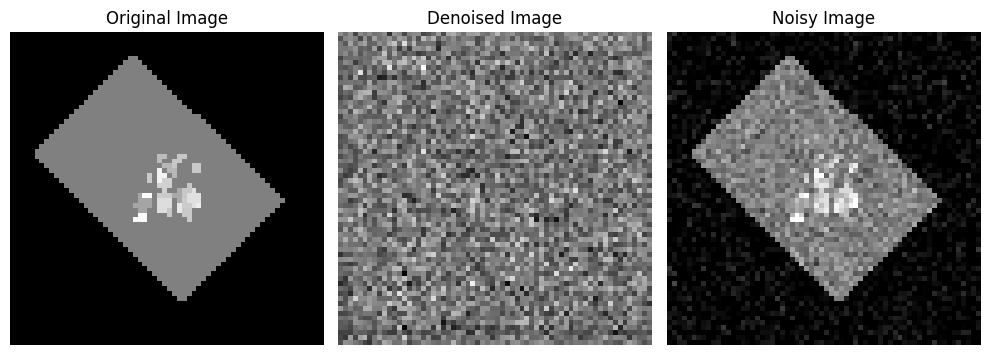

[2023-09-12 23:08:38] Intermediate result: {"iteration": 0, "loss": 0.14873, "psnr_gt": 7.79189}  (Index 0)
[2023-09-12 23:08:49] Intermediate result: {"iteration": 25, "loss": 0.0872, "psnr_gt": 10.78911}  (Index 1)
[2023-09-12 23:08:59] Intermediate result: {"iteration": 50, "loss": 0.05059, "psnr_gt": 13.27651}  (Index 2)
[2023-09-12 23:09:08] Intermediate result: {"iteration": 75, "loss": 0.03032, "psnr_gt": 15.23955}  (Index 3)
[2023-09-12 23:09:17] Intermediate result: {"iteration": 100, "loss": 0.02067, "psnr_gt": 17.58892}  (Index 4)
[2023-09-12 23:09:26] Intermediate result: {"iteration": 125, "loss": 0.02227, "psnr_gt": 16.93238}  (Index 5)
[2023-09-12 23:09:36] Intermediate result: {"iteration": 150, "loss": 0.01909, "psnr_gt": 17.72024}  (Index 6)
[2023-09-12 23:09:45] Intermediate result: {"iteration": 175, "loss": 0.02128, "psnr_gt": 17.16277}  (Index 7)


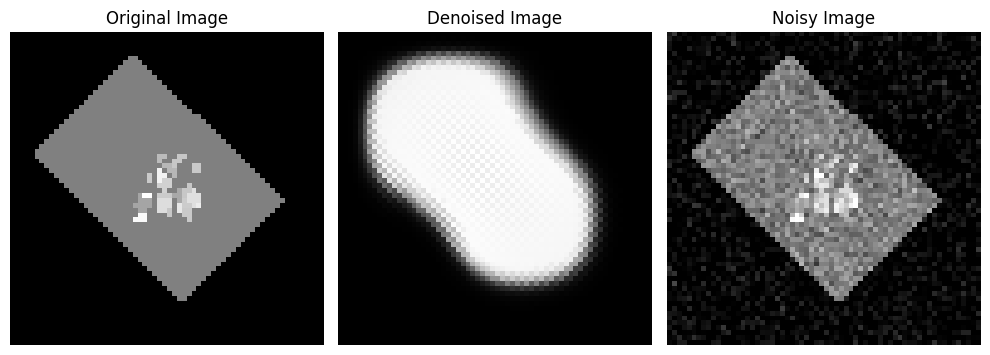

[2023-09-12 23:09:55] Intermediate result: {"iteration": 200, "loss": 0.03765, "psnr_gt": 14.62532}  (Index 8)
[2023-09-12 23:10:04] Intermediate result: {"iteration": 225, "loss": 0.01664, "psnr_gt": 18.55813}  (Index 9)
[2023-09-12 23:10:13] Intermediate result: {"iteration": 250, "loss": 0.01573, "psnr_gt": 18.88195}  (Index 10)
[2023-09-12 23:10:22] Intermediate result: {"iteration": 275, "loss": 0.02276, "psnr_gt": 16.80365}  (Index 11)
[2023-09-12 23:10:32] Intermediate result: {"iteration": 300, "loss": 0.01833, "psnr_gt": 18.60901}  (Index 12)
[2023-09-12 23:10:41] Intermediate result: {"iteration": 325, "loss": 0.01453, "psnr_gt": 19.30904}  (Index 13)
[2023-09-12 23:10:50] Intermediate result: {"iteration": 350, "loss": 0.01068, "psnr_gt": 21.22481}  (Index 14)
[2023-09-12 23:10:59] Intermediate result: {"iteration": 375, "loss": 0.01049, "psnr_gt": 20.79059}  (Index 15)


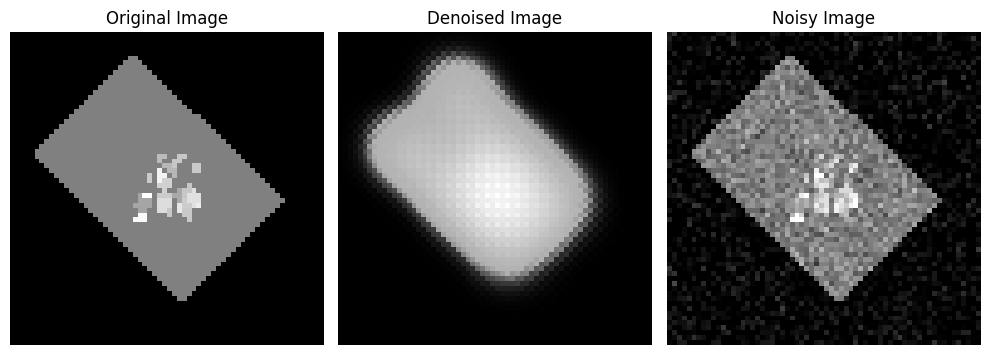

[2023-09-12 23:11:09] Intermediate result: {"iteration": 400, "loss": 0.0099, "psnr_gt": 21.60516}  (Index 16)
[2023-09-12 23:11:18] Intermediate result: {"iteration": 425, "loss": 0.0084, "psnr_gt": 22.91497}  (Index 17)
[2023-09-12 23:11:28] Intermediate result: {"iteration": 450, "loss": 0.00867, "psnr_gt": 22.47825}  (Index 18)
[2023-09-12 23:11:37] Intermediate result: {"iteration": 475, "loss": 0.00875, "psnr_gt": 22.11532}  (Index 19)
[2023-09-12 23:11:46] Intermediate result: {"iteration": 500, "loss": 0.01011, "psnr_gt": 21.35177}  (Index 20)
[2023-09-12 23:11:55] Intermediate result: {"iteration": 525, "loss": 0.00698, "psnr_gt": 24.42647}  (Index 21)
[2023-09-12 23:12:05] Intermediate result: {"iteration": 550, "loss": 0.0067, "psnr_gt": 24.4102}  (Index 22)
[2023-09-12 23:12:14] Intermediate result: {"iteration": 575, "loss": 0.01174, "psnr_gt": 20.69912}  (Index 23)


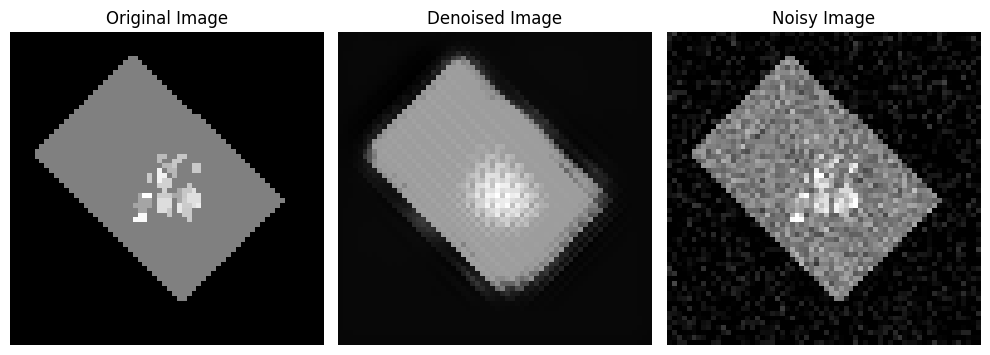

[2023-09-12 23:12:24] Intermediate result: {"iteration": 600, "loss": 0.00664, "psnr_gt": 24.516}  (Index 24)
[2023-09-12 23:12:33] Intermediate result: {"iteration": 625, "loss": 0.00762, "psnr_gt": 23.45321}  (Index 25)
[2023-09-12 23:12:43] Intermediate result: {"iteration": 650, "loss": 0.00682, "psnr_gt": 24.32026}  (Index 26)
[2023-09-12 23:12:52] Intermediate result: {"iteration": 675, "loss": 0.00524, "psnr_gt": 27.07082}  (Index 27)
[2023-09-12 23:13:02] Intermediate result: {"iteration": 700, "loss": 0.00874, "psnr_gt": 21.99322}  (Index 28)
[2023-09-12 23:13:11] Intermediate result: {"iteration": 725, "loss": 0.0074, "psnr_gt": 23.52734}  (Index 29)
[2023-09-12 23:13:20] Intermediate result: {"iteration": 750, "loss": 0.00536, "psnr_gt": 26.62387}  (Index 30)
[2023-09-12 23:13:29] Intermediate result: {"iteration": 775, "loss": 0.00528, "psnr_gt": 26.63618}  (Index 31)


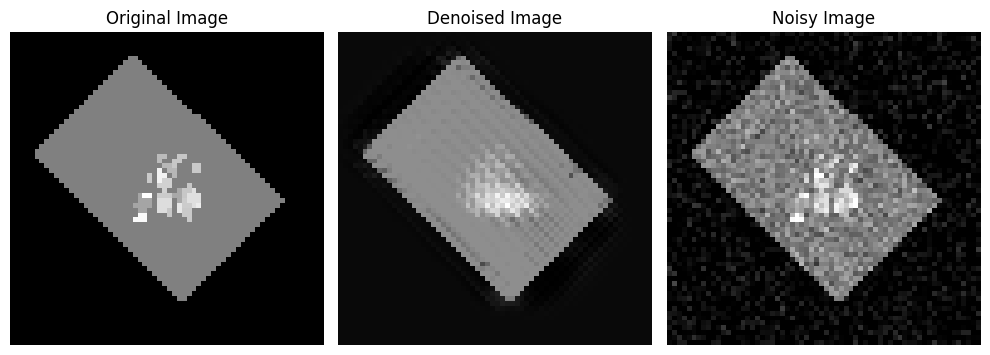

[2023-09-12 23:13:39] Intermediate result: {"iteration": 800, "loss": 0.00494, "psnr_gt": 26.5227}  (Index 32)
[2023-09-12 23:13:49] Intermediate result: {"iteration": 825, "loss": 0.0115, "psnr_gt": 20.30949}  (Index 33)
[2023-09-12 23:13:58] Intermediate result: {"iteration": 850, "loss": 0.01218, "psnr_gt": 20.09044}  (Index 34)
[2023-09-12 23:14:07] Intermediate result: {"iteration": 875, "loss": 0.00529, "psnr_gt": 27.30235}  (Index 35)
[2023-09-12 23:14:17] Intermediate result: {"iteration": 900, "loss": 0.00485, "psnr_gt": 26.54338}  (Index 36)
[2023-09-12 23:14:26] Intermediate result: {"iteration": 925, "loss": 0.00479, "psnr_gt": 26.85213}  (Index 37)
[2023-09-12 23:14:35] Intermediate result: {"iteration": 950, "loss": 0.00448, "psnr_gt": 26.98373}  (Index 38)
[2023-09-12 23:14:44] Intermediate result: {"iteration": 975, "loss": 0.00423, "psnr_gt": 27.30191}  (Index 39)


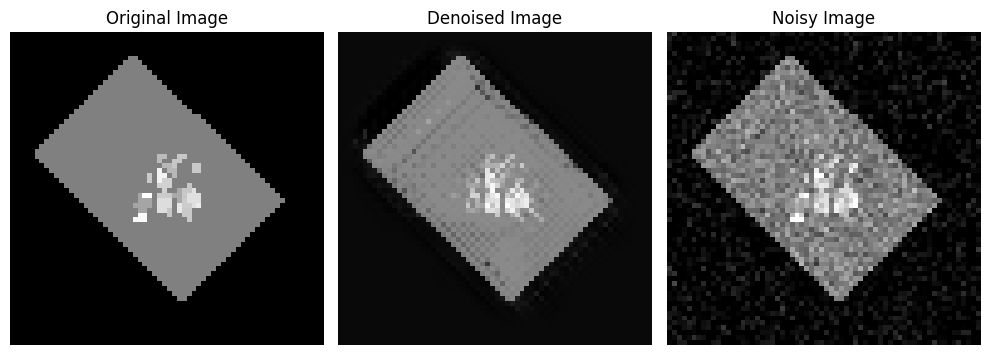

[2023-09-12 23:14:54] Intermediate result: {"iteration": 1000, "loss": 0.00413, "psnr_gt": 27.20371}  (Index 40)
[2023-09-12 23:15:04] Intermediate result: {"iteration": 1025, "loss": 0.0041, "psnr_gt": 27.15002}  (Index 41)
[2023-09-12 23:15:13] Intermediate result: {"iteration": 1050, "loss": 0.00388, "psnr_gt": 27.41541}  (Index 42)
[2023-09-12 23:15:23] Intermediate result: {"iteration": 1075, "loss": 0.00816, "psnr_gt": 21.82566}  (Index 43)
[2023-09-12 23:15:33] Intermediate result: {"iteration": 1100, "loss": 0.00555, "psnr_gt": 25.36233}  (Index 44)
[2023-09-12 23:15:42] Intermediate result: {"iteration": 1125, "loss": 0.00491, "psnr_gt": 27.20655}  (Index 45)
[2023-09-12 23:15:52] Intermediate result: {"iteration": 1150, "loss": 0.00546, "psnr_gt": 26.03602}  (Index 46)
[2023-09-12 23:16:01] Intermediate result: {"iteration": 1175, "loss": 0.00474, "psnr_gt": 27.60546}  (Index 47)


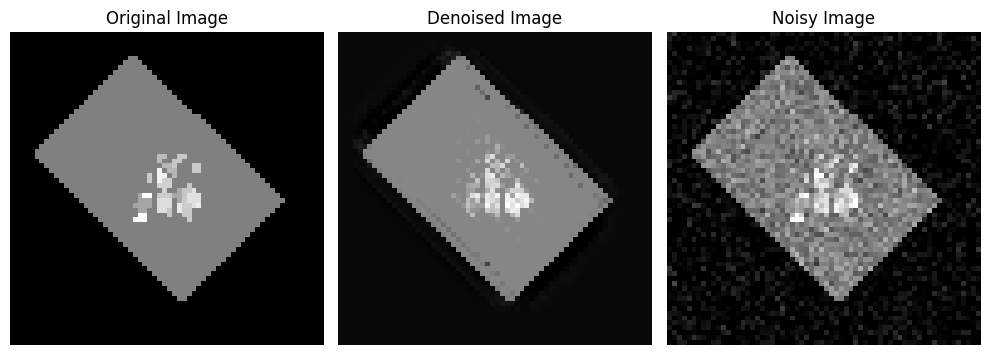

[2023-09-12 23:16:11] Intermediate result: {"iteration": 1200, "loss": 0.00435, "psnr_gt": 27.87497}  (Index 48)
[2023-09-12 23:16:20] Intermediate result: {"iteration": 1225, "loss": 0.00426, "psnr_gt": 28.26377}  (Index 49)
[2023-09-12 23:16:30] Intermediate result: {"iteration": 1250, "loss": 0.00411, "psnr_gt": 27.67078}  (Index 50)
[2023-09-12 23:16:39] Intermediate result: {"iteration": 1275, "loss": 0.00413, "psnr_gt": 28.06547}  (Index 51)
[2023-09-12 23:16:49] Intermediate result: {"iteration": 1300, "loss": 0.01215, "psnr_gt": 21.09435}  (Index 52)
[2023-09-12 23:16:59] Intermediate result: {"iteration": 1325, "loss": 0.00798, "psnr_gt": 24.90147}  (Index 53)
[2023-09-12 23:17:08] Intermediate result: {"iteration": 1350, "loss": 0.00789, "psnr_gt": 25.06511}  (Index 54)
[2023-09-12 23:17:18] Intermediate result: {"iteration": 1375, "loss": 0.00663, "psnr_gt": 26.9015}  (Index 55)


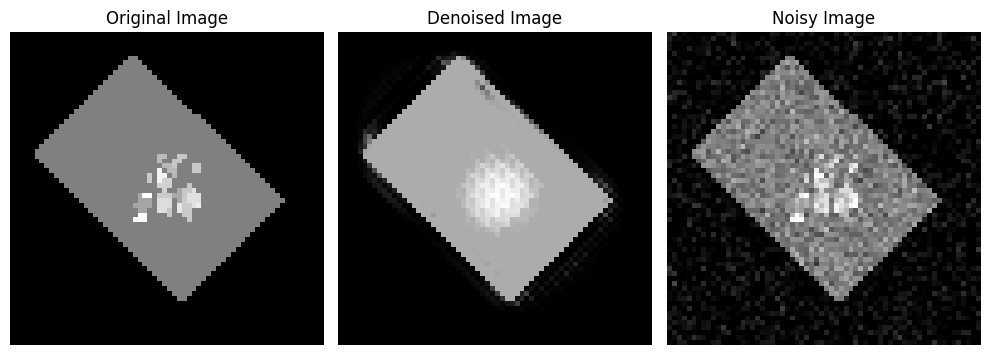

[2023-09-12 23:17:28] Intermediate result: {"iteration": 1400, "loss": 0.00617, "psnr_gt": 27.61602}  (Index 56)
[2023-09-12 23:17:37] Intermediate result: {"iteration": 1425, "loss": 0.00867, "psnr_gt": 23.62543}  (Index 57)
[2023-09-12 23:17:47] Intermediate result: {"iteration": 1450, "loss": 0.00683, "psnr_gt": 25.44607}  (Index 58)
[2023-09-12 23:17:56] Intermediate result: {"iteration": 1475, "loss": 0.00635, "psnr_gt": 25.74524}  (Index 59)
[2023-09-12 23:18:06] Intermediate result: {"iteration": 1500, "loss": 0.00621, "psnr_gt": 25.45958}  (Index 60)
[2023-09-12 23:18:15] Intermediate result: {"iteration": 1525, "loss": 0.00611, "psnr_gt": 25.1581}  (Index 61)
[2023-09-12 23:18:25] Intermediate result: {"iteration": 1550, "loss": 0.00589, "psnr_gt": 25.11918}  (Index 62)
[2023-09-12 23:18:34] Intermediate result: {"iteration": 1575, "loss": 0.00587, "psnr_gt": 25.1861}  (Index 63)


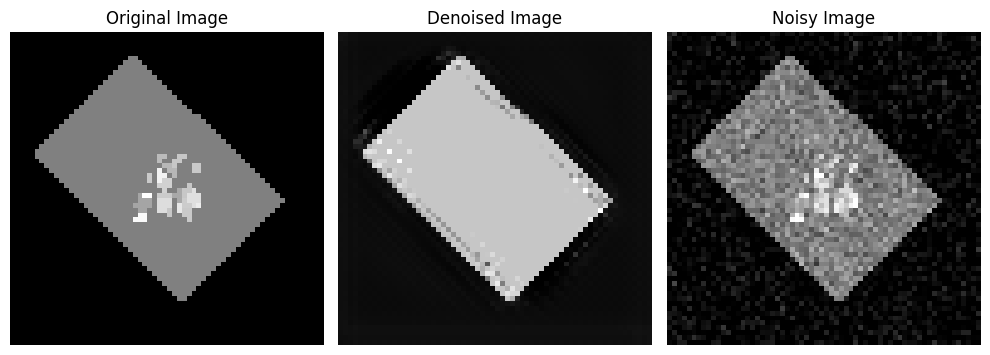

[2023-09-12 23:18:45] Intermediate result: {"iteration": 1600, "loss": 0.00579, "psnr_gt": 25.14043}  (Index 64)
[2023-09-12 23:18:54] Intermediate result: {"iteration": 1625, "loss": 0.0058, "psnr_gt": 25.24334}  (Index 65)
[2023-09-12 23:19:04] Intermediate result: {"iteration": 1650, "loss": 0.00575, "psnr_gt": 25.10818}  (Index 66)
[2023-09-12 23:19:13] Intermediate result: {"iteration": 1675, "loss": 0.0058, "psnr_gt": 25.13694}  (Index 67)
[2023-09-12 23:19:23] Intermediate result: {"iteration": 1700, "loss": 0.0077, "psnr_gt": 23.55353}  (Index 68)
[2023-09-12 23:19:32] Intermediate result: {"iteration": 1725, "loss": 0.00652, "psnr_gt": 25.09674}  (Index 69)
[2023-09-12 23:19:42] Intermediate result: {"iteration": 1750, "loss": 0.006, "psnr_gt": 25.43703}  (Index 70)
[2023-09-12 23:19:51] Intermediate result: {"iteration": 1775, "loss": 0.0059, "psnr_gt": 25.52392}  (Index 71)


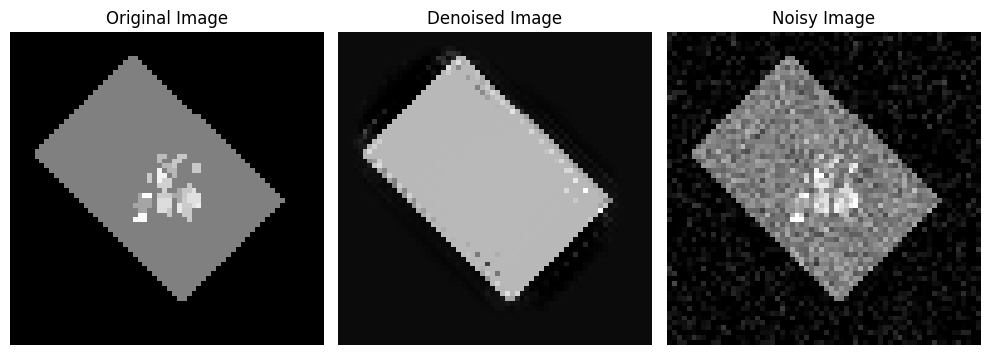

[2023-09-12 23:20:01] Intermediate result: {"iteration": 1800, "loss": 0.00585, "psnr_gt": 25.25486}  (Index 72)
[2023-09-12 23:20:11] Intermediate result: {"iteration": 1825, "loss": 0.00581, "psnr_gt": 25.0554}  (Index 73)
[2023-09-12 23:20:20] Intermediate result: {"iteration": 1850, "loss": 0.00575, "psnr_gt": 25.16892}  (Index 74)
[2023-09-12 23:20:29] Intermediate result: {"iteration": 1875, "loss": 0.00572, "psnr_gt": 25.15307}  (Index 75)
[2023-09-12 23:20:39] Intermediate result: {"iteration": 1900, "loss": 0.00569, "psnr_gt": 25.07511}  (Index 76)
[2023-09-12 23:20:48] Intermediate result: {"iteration": 1925, "loss": 0.00572, "psnr_gt": 25.25784}  (Index 77)
[2023-09-12 23:20:58] Intermediate result: {"iteration": 1950, "loss": 0.0057, "psnr_gt": 25.10636}  (Index 78)
[2023-09-12 23:21:07] Intermediate result: {"iteration": 1975, "loss": 0.00571, "psnr_gt": 24.82051}  (Index 79)


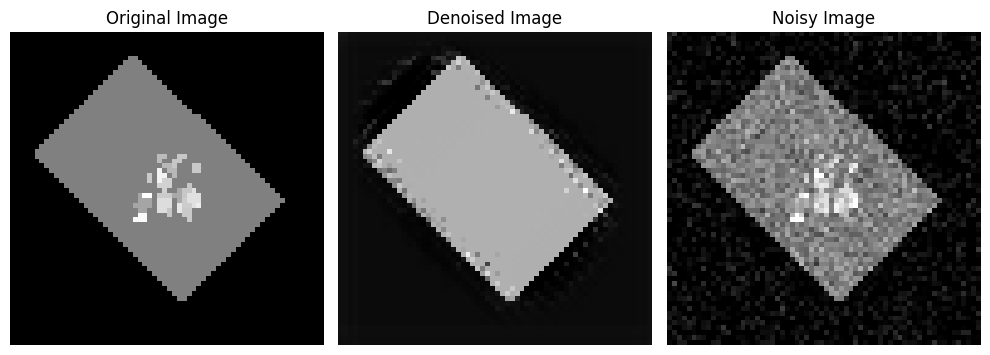

[2023-09-12 23:21:17] Intermediate result: {"iteration": 2000, "loss": 0.00566, "psnr_gt": 24.85556}  (Index 80)
[2023-09-12 23:21:27] Intermediate result: {"iteration": 2025, "loss": 0.01526, "psnr_gt": 19.06357}  (Index 81)
[2023-09-12 23:21:36] Intermediate result: {"iteration": 2050, "loss": 0.00669, "psnr_gt": 24.49545}  (Index 82)
[2023-09-12 23:21:46] Intermediate result: {"iteration": 2075, "loss": 0.00621, "psnr_gt": 25.18951}  (Index 83)
[2023-09-12 23:21:55] Intermediate result: {"iteration": 2100, "loss": 0.00602, "psnr_gt": 25.09931}  (Index 84)
[2023-09-12 23:22:05] Intermediate result: {"iteration": 2125, "loss": 0.00593, "psnr_gt": 25.14034}  (Index 85)
[2023-09-12 23:22:15] Intermediate result: {"iteration": 2150, "loss": 0.00585, "psnr_gt": 25.3363}  (Index 86)
[2023-09-12 23:22:24] Intermediate result: {"iteration": 2175, "loss": 0.0058, "psnr_gt": 25.26737}  (Index 87)


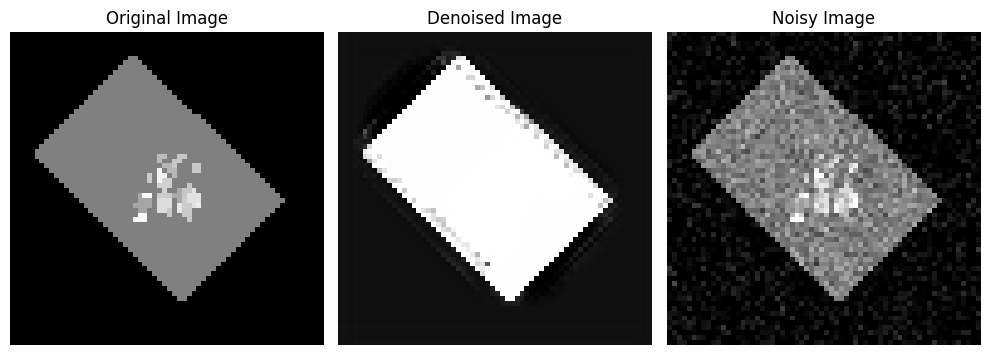

[2023-09-12 23:22:34] Intermediate result: {"iteration": 2200, "loss": 0.00582, "psnr_gt": 25.32751}  (Index 88)
[2023-09-12 23:22:44] Intermediate result: {"iteration": 2225, "loss": 0.00581, "psnr_gt": 25.18692}  (Index 89)
[2023-09-12 23:22:53] Intermediate result: {"iteration": 2250, "loss": 0.03213, "psnr_gt": 14.29994}  (Index 90)
[2023-09-12 23:23:03] Intermediate result: {"iteration": 2275, "loss": 0.01562, "psnr_gt": 19.22846}  (Index 91)
[2023-09-12 23:23:13] Intermediate result: {"iteration": 2300, "loss": 0.01406, "psnr_gt": 19.6581}  (Index 92)
[2023-09-12 23:23:22] Intermediate result: {"iteration": 2325, "loss": 0.01173, "psnr_gt": 20.86851}  (Index 93)
[2023-09-12 23:23:31] Intermediate result: {"iteration": 2350, "loss": 0.00919, "psnr_gt": 22.4154}  (Index 94)
[2023-09-12 23:23:41] Intermediate result: {"iteration": 2375, "loss": 0.01027, "psnr_gt": 21.80471}  (Index 95)


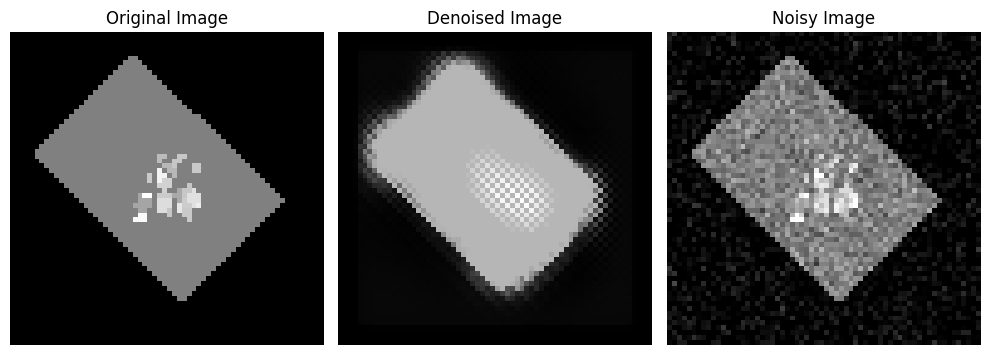

[2023-09-12 23:23:51] Intermediate result: {"iteration": 2400, "loss": 0.00826, "psnr_gt": 23.39508}  (Index 96)
[2023-09-12 23:24:00] Intermediate result: {"iteration": 2425, "loss": 0.00942, "psnr_gt": 22.66079}  (Index 97)
[2023-09-12 23:24:10] Intermediate result: {"iteration": 2450, "loss": 0.0076, "psnr_gt": 23.81251}  (Index 98)
[2023-09-12 23:24:19] Intermediate result: {"iteration": 2475, "loss": 0.00722, "psnr_gt": 24.58246}  (Index 99)
[2023-09-12 23:24:29] Intermediate result: {"iteration": 2500, "loss": 0.00646, "psnr_gt": 25.67707}  (Index 100)
[2023-09-12 23:24:38] Intermediate result: {"iteration": 2525, "loss": 0.00652, "psnr_gt": 25.40582}  (Index 101)
[2023-09-12 23:24:48] Intermediate result: {"iteration": 2550, "loss": 0.00608, "psnr_gt": 26.1696}  (Index 102)
[2023-09-12 23:24:58] Intermediate result: {"iteration": 2575, "loss": 0.00602, "psnr_gt": 26.28668}  (Index 103)


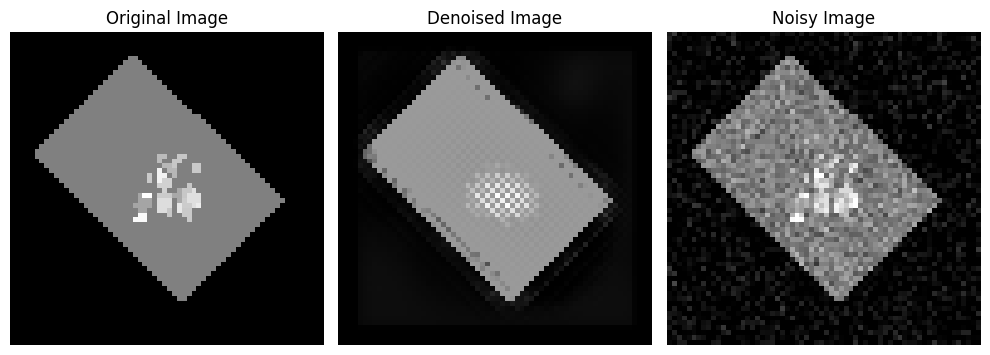

[2023-09-12 23:25:08] Intermediate result: {"iteration": 2600, "loss": 0.00584, "psnr_gt": 26.40733}  (Index 104)
[2023-09-12 23:25:18] Intermediate result: {"iteration": 2625, "loss": 0.00582, "psnr_gt": 26.21564}  (Index 105)
[2023-09-12 23:25:28] Intermediate result: {"iteration": 2650, "loss": 0.00578, "psnr_gt": 26.61448}  (Index 106)
[2023-09-12 23:25:37] Intermediate result: {"iteration": 2675, "loss": 0.00617, "psnr_gt": 25.89251}  (Index 107)
[2023-09-12 23:25:47] Intermediate result: {"iteration": 2700, "loss": 0.0061, "psnr_gt": 26.00329}  (Index 108)
[2023-09-12 23:25:57] Intermediate result: {"iteration": 2725, "loss": 0.00568, "psnr_gt": 26.89997}  (Index 109)
[2023-09-12 23:26:07] Intermediate result: {"iteration": 2750, "loss": 0.00559, "psnr_gt": 26.24067}  (Index 110)
[2023-09-12 23:26:16] Intermediate result: {"iteration": 2775, "loss": 0.00546, "psnr_gt": 26.29316}  (Index 111)


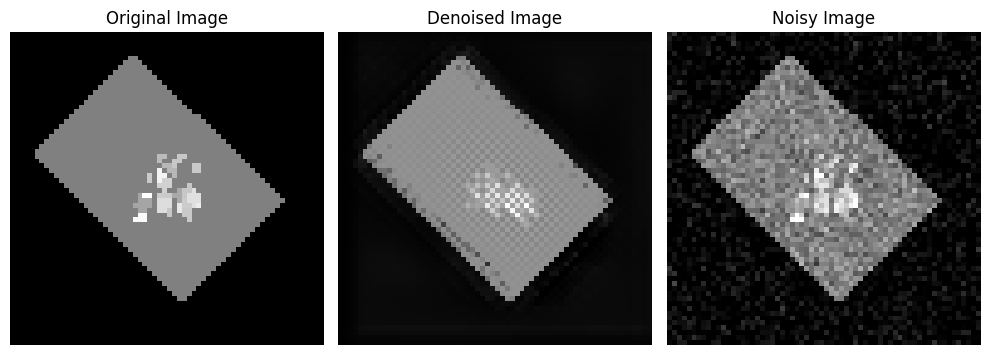

[2023-09-12 23:26:26] Intermediate result: {"iteration": 2800, "loss": 0.00517, "psnr_gt": 26.23744}  (Index 112)
[2023-09-12 23:26:36] Intermediate result: {"iteration": 2825, "loss": 0.00498, "psnr_gt": 26.40661}  (Index 113)
[2023-09-12 23:26:45] Intermediate result: {"iteration": 2850, "loss": 0.00537, "psnr_gt": 25.80529}  (Index 114)
[2023-09-12 23:26:55] Intermediate result: {"iteration": 2875, "loss": 0.00508, "psnr_gt": 26.46038}  (Index 115)
[2023-09-12 23:27:04] Intermediate result: {"iteration": 2900, "loss": 0.00493, "psnr_gt": 26.29712}  (Index 116)
[2023-09-12 23:27:14] Intermediate result: {"iteration": 2925, "loss": 0.00487, "psnr_gt": 26.02137}  (Index 117)
[2023-09-12 23:27:23] Intermediate result: {"iteration": 2950, "loss": 0.00802, "psnr_gt": 22.44452}  (Index 118)
[2023-09-12 23:27:33] Intermediate result: {"iteration": 2975, "loss": 0.00681, "psnr_gt": 24.16418}  (Index 119)


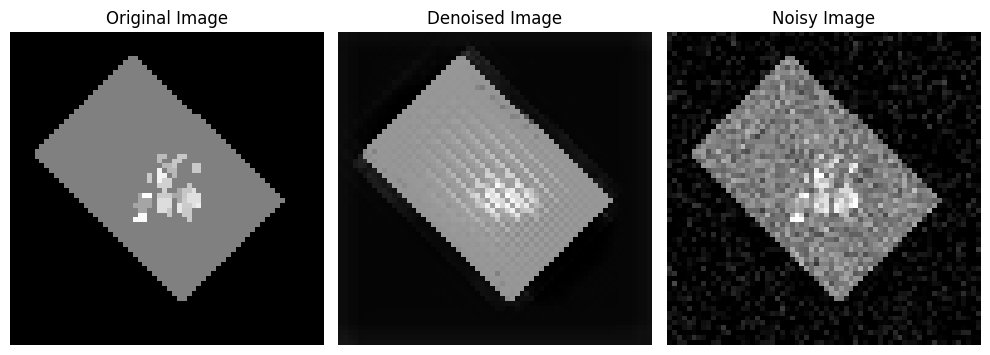

[2023-09-12 23:27:43] Intermediate result: {"iteration": 3000, "loss": 0.00537, "psnr_gt": 26.85655}  (Index 120)
[2023-09-12 23:27:52] Intermediate result: {"iteration": 3025, "loss": 0.00498, "psnr_gt": 26.41296}  (Index 121)
[2023-09-12 23:28:02] Intermediate result: {"iteration": 3050, "loss": 0.00627, "psnr_gt": 24.55693}  (Index 122)
[2023-09-12 23:28:11] Intermediate result: {"iteration": 3075, "loss": 0.00483, "psnr_gt": 27.15132}  (Index 123)
[2023-09-12 23:28:21] Intermediate result: {"iteration": 3100, "loss": 0.00438, "psnr_gt": 27.41673}  (Index 124)
[2023-09-12 23:28:30] Intermediate result: {"iteration": 3125, "loss": 0.00441, "psnr_gt": 27.55317}  (Index 125)
[2023-09-12 23:28:40] Intermediate result: {"iteration": 3150, "loss": 0.0041, "psnr_gt": 27.43701}  (Index 126)
[2023-09-12 23:28:49] Intermediate result: {"iteration": 3175, "loss": 0.00425, "psnr_gt": 27.13204}  (Index 127)


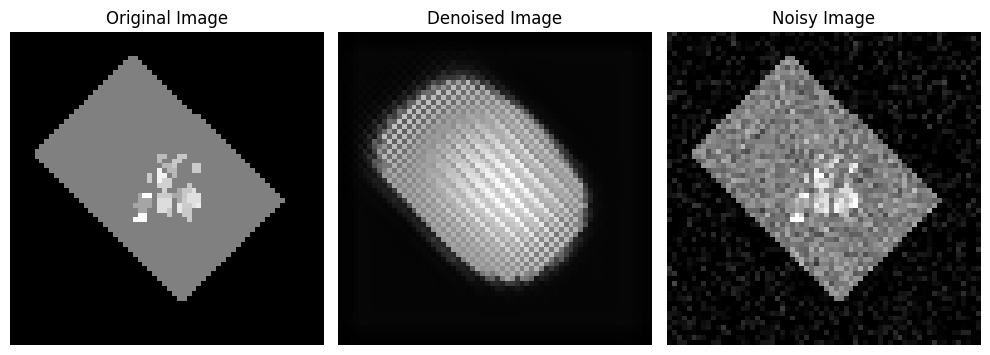

[2023-09-12 23:28:59] Intermediate result: {"iteration": 3200, "loss": 0.01505, "psnr_gt": 19.34872}  (Index 128)
[2023-09-12 23:29:08] Intermediate result: {"iteration": 3225, "loss": 0.00857, "psnr_gt": 23.24438}  (Index 129)
[2023-09-12 23:29:18] Intermediate result: {"iteration": 3250, "loss": 0.00724, "psnr_gt": 23.60283}  (Index 130)
[2023-09-12 23:29:27] Intermediate result: {"iteration": 3275, "loss": 0.00604, "psnr_gt": 25.26143}  (Index 131)
[2023-09-12 23:29:37] Intermediate result: {"iteration": 3300, "loss": 0.00561, "psnr_gt": 26.00559}  (Index 132)
[2023-09-12 23:29:46] Intermediate result: {"iteration": 3325, "loss": 0.00556, "psnr_gt": 25.87866}  (Index 133)
[2023-09-12 23:29:56] Intermediate result: {"iteration": 3350, "loss": 0.00543, "psnr_gt": 26.14329}  (Index 134)
[2023-09-12 23:30:05] Intermediate result: {"iteration": 3375, "loss": 0.00524, "psnr_gt": 26.24346}  (Index 135)


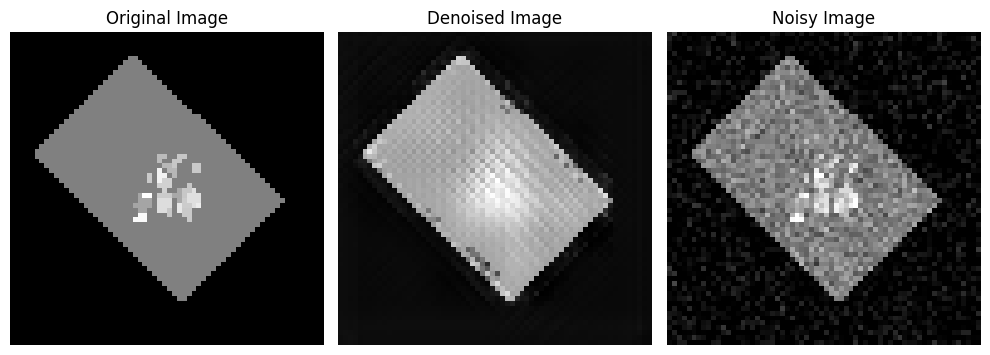

[2023-09-12 23:30:15] Intermediate result: {"iteration": 3400, "loss": 0.00516, "psnr_gt": 25.99191}  (Index 136)
[2023-09-12 23:30:25] Intermediate result: {"iteration": 3425, "loss": 0.00496, "psnr_gt": 26.08006}  (Index 137)
[2023-09-12 23:30:34] Intermediate result: {"iteration": 3450, "loss": 0.00779, "psnr_gt": 22.31484}  (Index 138)
[2023-09-12 23:30:44] Intermediate result: {"iteration": 3475, "loss": 0.00625, "psnr_gt": 25.51832}  (Index 139)
[2023-09-12 23:30:53] Intermediate result: {"iteration": 3500, "loss": 0.00504, "psnr_gt": 26.33734}  (Index 140)
[2023-09-12 23:31:03] Intermediate result: {"iteration": 3525, "loss": 0.00474, "psnr_gt": 26.20039}  (Index 141)
[2023-09-12 23:31:12] Intermediate result: {"iteration": 3550, "loss": 0.00459, "psnr_gt": 25.73738}  (Index 142)
[2023-09-12 23:31:22] Intermediate result: {"iteration": 3575, "loss": 0.00452, "psnr_gt": 25.99637}  (Index 143)


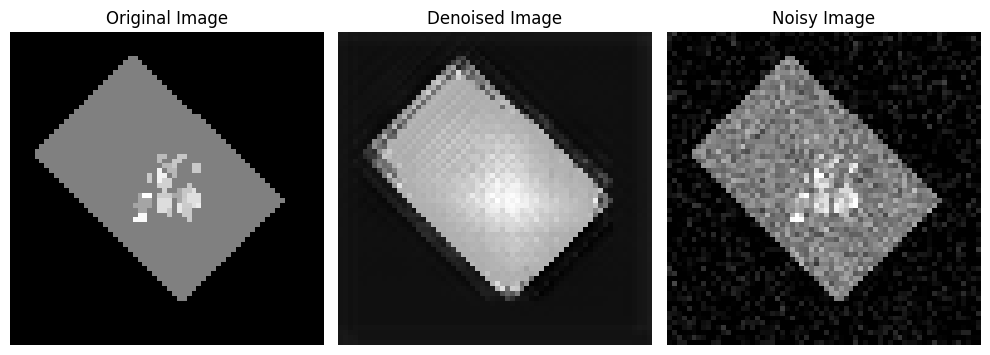

[2023-09-12 23:31:32] Intermediate result: {"iteration": 3600, "loss": 0.00699, "psnr_gt": 23.25321}  (Index 144)
[2023-09-12 23:31:42] Intermediate result: {"iteration": 3625, "loss": 0.005, "psnr_gt": 26.17613}  (Index 145)
[2023-09-12 23:31:51] Intermediate result: {"iteration": 3650, "loss": 0.00461, "psnr_gt": 26.66404}  (Index 146)
[2023-09-12 23:32:01] Intermediate result: {"iteration": 3675, "loss": 0.00373, "psnr_gt": 27.47124}  (Index 147)
[2023-09-12 23:32:11] Intermediate result: {"iteration": 3700, "loss": 0.00412, "psnr_gt": 26.76219}  (Index 148)
[2023-09-12 23:32:20] Intermediate result: {"iteration": 3725, "loss": 0.0032, "psnr_gt": 26.89544}  (Index 149)
[2023-09-12 23:32:30] Intermediate result: {"iteration": 3750, "loss": 0.00306, "psnr_gt": 26.73703}  (Index 150)
[2023-09-12 23:32:40] Intermediate result: {"iteration": 3775, "loss": 0.00297, "psnr_gt": 26.17664}  (Index 151)


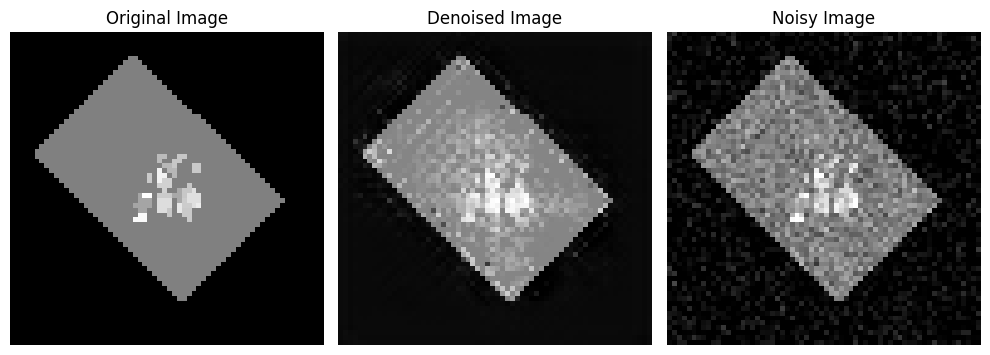

[2023-09-12 23:32:50] Intermediate result: {"iteration": 3800, "loss": 0.00363, "psnr_gt": 26.03414}  (Index 152)
[2023-09-12 23:33:00] Intermediate result: {"iteration": 3825, "loss": 0.00286, "psnr_gt": 25.91753}  (Index 153)
[2023-09-12 23:33:10] Intermediate result: {"iteration": 3850, "loss": 0.00315, "psnr_gt": 25.84503}  (Index 154)
[2023-09-12 23:33:19] Intermediate result: {"iteration": 3875, "loss": 0.00257, "psnr_gt": 26.04678}  (Index 155)
[2023-09-12 23:33:29] Intermediate result: {"iteration": 3900, "loss": 0.0025, "psnr_gt": 26.08861}  (Index 156)
[2023-09-12 23:33:39] Intermediate result: {"iteration": 3925, "loss": 0.00604, "psnr_gt": 23.99872}  (Index 157)
[2023-09-12 23:33:48] Intermediate result: {"iteration": 3950, "loss": 0.00414, "psnr_gt": 27.63441}  (Index 158)
[2023-09-12 23:33:58] Intermediate result: {"iteration": 3975, "loss": 0.00348, "psnr_gt": 28.24275}  (Index 159)


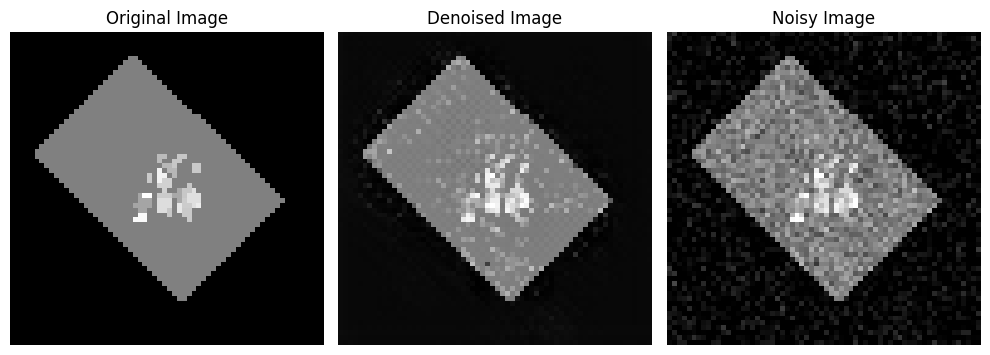

[2023-09-12 23:34:09] Intermediate result: {"iteration": 4000, "loss": 0.00308, "psnr_gt": 27.45887}  (Index 160)
[2023-09-12 23:34:18] Intermediate result: {"iteration": 4025, "loss": 0.00287, "psnr_gt": 26.51783}  (Index 161)
[2023-09-12 23:34:28] Intermediate result: {"iteration": 4050, "loss": 0.00254, "psnr_gt": 26.19224}  (Index 162)
[2023-09-12 23:34:37] Intermediate result: {"iteration": 4075, "loss": 0.00239, "psnr_gt": 25.93459}  (Index 163)
[2023-09-12 23:34:47] Intermediate result: {"iteration": 4100, "loss": 0.00226, "psnr_gt": 25.20359}  (Index 164)
[2023-09-12 23:34:56] Intermediate result: {"iteration": 4125, "loss": 0.00191, "psnr_gt": 25.23423}  (Index 165)
[2023-09-12 23:35:06] Intermediate result: {"iteration": 4150, "loss": 0.00182, "psnr_gt": 24.85122}  (Index 166)
[2023-09-12 23:35:16] Intermediate result: {"iteration": 4175, "loss": 0.00269, "psnr_gt": 26.31513}  (Index 167)


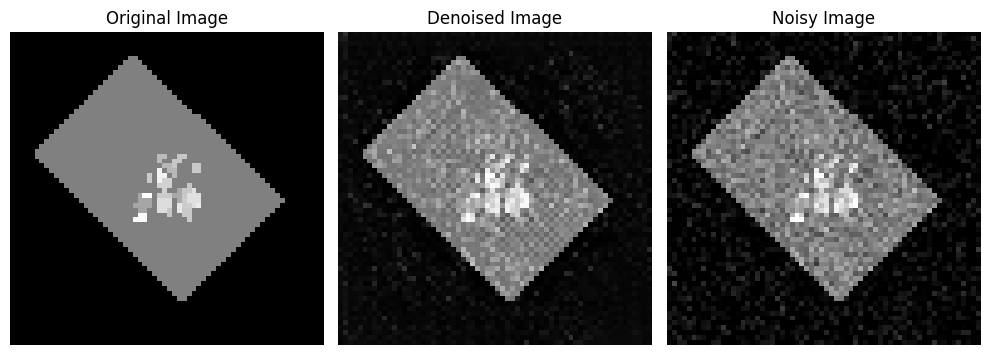

[2023-09-12 23:35:26] Intermediate result: {"iteration": 4200, "loss": 0.00201, "psnr_gt": 25.11472}  (Index 168)
[2023-09-12 23:35:35] Intermediate result: {"iteration": 4225, "loss": 0.00149, "psnr_gt": 24.86015}  (Index 169)
[2023-09-12 23:35:45] Intermediate result: {"iteration": 4250, "loss": 0.00145, "psnr_gt": 24.54729}  (Index 170)
[2023-09-12 23:35:54] Intermediate result: {"iteration": 4275, "loss": 0.00122, "psnr_gt": 23.27342}  (Index 171)
[2023-09-12 23:36:03] Intermediate result: {"iteration": 4300, "loss": 0.00209, "psnr_gt": 25.06411}  (Index 172)
[2023-09-12 23:36:13] Intermediate result: {"iteration": 4325, "loss": 0.00122, "psnr_gt": 24.17423}  (Index 173)
[2023-09-12 23:36:23] Intermediate result: {"iteration": 4350, "loss": 0.00093, "psnr_gt": 24.42345}  (Index 174)
[2023-09-12 23:36:32] Intermediate result: {"iteration": 4375, "loss": 0.0147, "psnr_gt": 18.67098}  (Index 175)


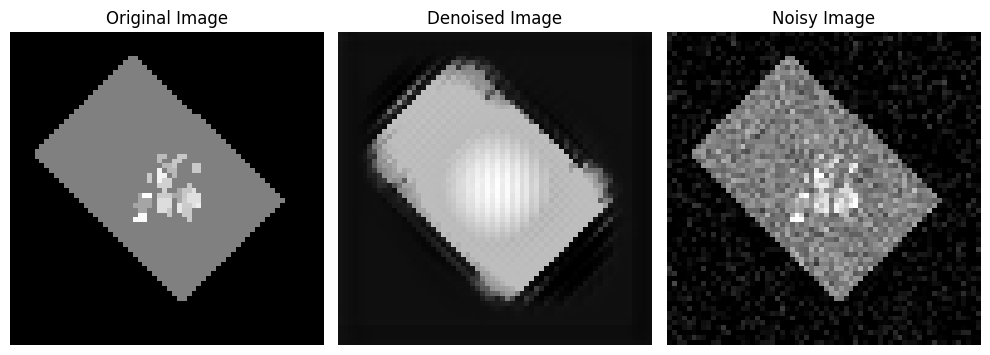

[2023-09-12 23:36:42] Intermediate result: {"iteration": 4400, "loss": 0.00747, "psnr_gt": 23.34329}  (Index 176)
[2023-09-12 23:36:51] Intermediate result: {"iteration": 4425, "loss": 0.00569, "psnr_gt": 26.02717}  (Index 177)
[2023-09-12 23:37:00] Intermediate result: {"iteration": 4450, "loss": 0.00815, "psnr_gt": 23.62874}  (Index 178)
[2023-09-12 23:37:10] Intermediate result: {"iteration": 4475, "loss": 0.00607, "psnr_gt": 25.6595}  (Index 179)
[2023-09-12 23:37:19] Intermediate result: {"iteration": 4500, "loss": 0.00528, "psnr_gt": 26.8458}  (Index 180)
[2023-09-12 23:37:28] Intermediate result: {"iteration": 4525, "loss": 0.00518, "psnr_gt": 26.76901}  (Index 181)
[2023-09-12 23:37:38] Intermediate result: {"iteration": 4550, "loss": 0.00516, "psnr_gt": 26.94247}  (Index 182)
[2023-09-12 23:37:47] Intermediate result: {"iteration": 4575, "loss": 0.00503, "psnr_gt": 26.91716}  (Index 183)


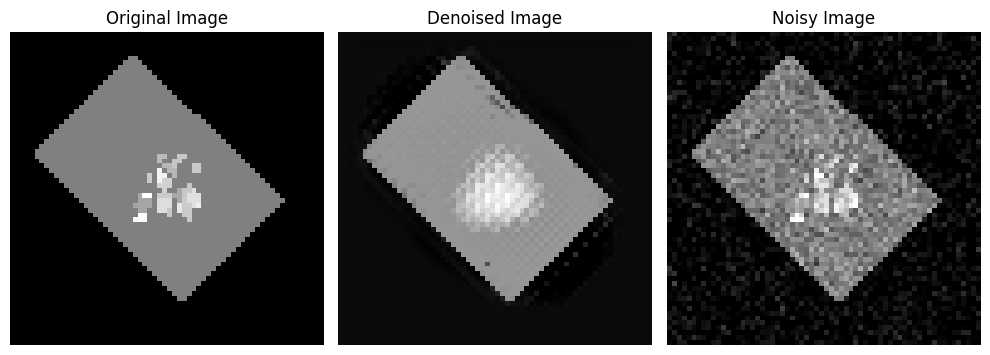

[2023-09-12 23:37:57] Intermediate result: {"iteration": 4600, "loss": 0.00518, "psnr_gt": 26.55343}  (Index 184)
[2023-09-12 23:38:06] Intermediate result: {"iteration": 4625, "loss": 0.00492, "psnr_gt": 27.14914}  (Index 185)
[2023-09-12 23:38:16] Intermediate result: {"iteration": 4650, "loss": 0.00552, "psnr_gt": 26.28619}  (Index 186)
[2023-09-12 23:38:25] Intermediate result: {"iteration": 4675, "loss": 0.00508, "psnr_gt": 26.84196}  (Index 187)
[2023-09-12 23:38:34] Intermediate result: {"iteration": 4700, "loss": 0.00492, "psnr_gt": 26.68951}  (Index 188)
[2023-09-12 23:38:44] Intermediate result: {"iteration": 4725, "loss": 0.00698, "psnr_gt": 24.52122}  (Index 189)
[2023-09-12 23:38:53] Intermediate result: {"iteration": 4750, "loss": 0.00617, "psnr_gt": 24.69352}  (Index 190)
[2023-09-12 23:39:02] Intermediate result: {"iteration": 4775, "loss": 0.00537, "psnr_gt": 26.73416}  (Index 191)


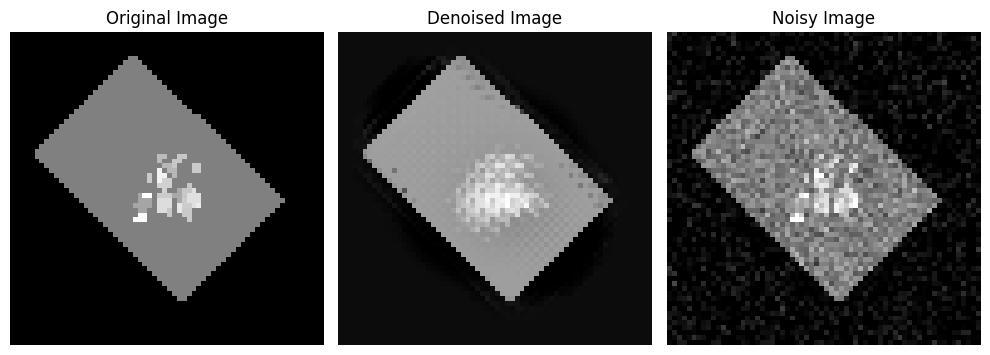

[2023-09-12 23:39:12] Intermediate result: {"iteration": 4800, "loss": 0.00496, "psnr_gt": 26.62171}  (Index 192)
[2023-09-12 23:39:21] Intermediate result: {"iteration": 4825, "loss": 0.00469, "psnr_gt": 27.19261}  (Index 193)
[2023-09-12 23:39:31] Intermediate result: {"iteration": 4850, "loss": 0.00543, "psnr_gt": 26.85578}  (Index 194)
[2023-09-12 23:39:40] Intermediate result: {"iteration": 4875, "loss": 0.00514, "psnr_gt": 26.66586}  (Index 195)
[2023-09-12 23:39:50] Intermediate result: {"iteration": 4900, "loss": 0.00496, "psnr_gt": 26.44996}  (Index 196)
[2023-09-12 23:39:59] Intermediate result: {"iteration": 4925, "loss": 0.00546, "psnr_gt": 26.59898}  (Index 197)
[2023-09-12 23:40:08] Intermediate result: {"iteration": 4950, "loss": 0.00534, "psnr_gt": 27.3014}  (Index 198)
[2023-09-12 23:40:18] Intermediate result: {"iteration": 4975, "loss": 0.00532, "psnr_gt": 26.90046}  (Index 199)


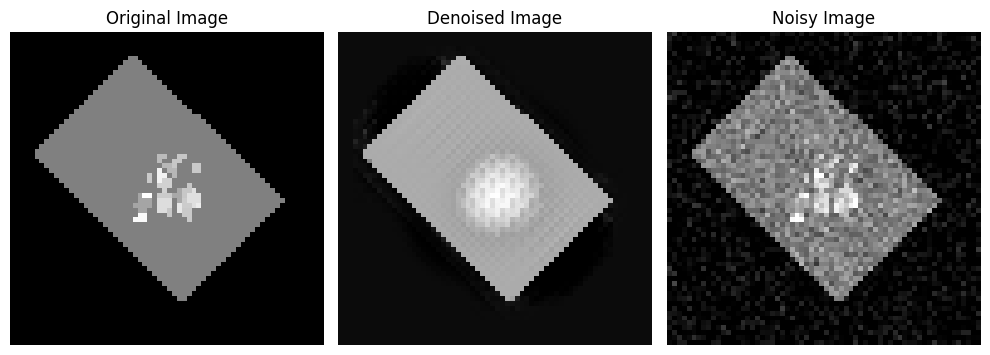

[2023-09-12 23:40:28] Intermediate result: {"iteration": 5000, "loss": 0.00516, "psnr_gt": 27.06227}  (Index 200)
[2023-09-12 23:40:37] Intermediate result: {"iteration": 5025, "loss": 0.00507, "psnr_gt": 26.94306}  (Index 201)
[2023-09-12 23:40:46] Intermediate result: {"iteration": 5050, "loss": 0.00496, "psnr_gt": 26.94164}  (Index 202)
[2023-09-12 23:40:56] Intermediate result: {"iteration": 5075, "loss": 0.00485, "psnr_gt": 26.83752}  (Index 203)
[2023-09-12 23:41:05] Intermediate result: {"iteration": 5100, "loss": 0.00463, "psnr_gt": 27.03061}  (Index 204)
[2023-09-12 23:41:14] Intermediate result: {"iteration": 5125, "loss": 0.00441, "psnr_gt": 27.17781}  (Index 205)
[2023-09-12 23:41:24] Intermediate result: {"iteration": 5150, "loss": 0.00404, "psnr_gt": 27.54291}  (Index 206)
[2023-09-12 23:41:33] Intermediate result: {"iteration": 5175, "loss": 0.00364, "psnr_gt": 28.3367}  (Index 207)


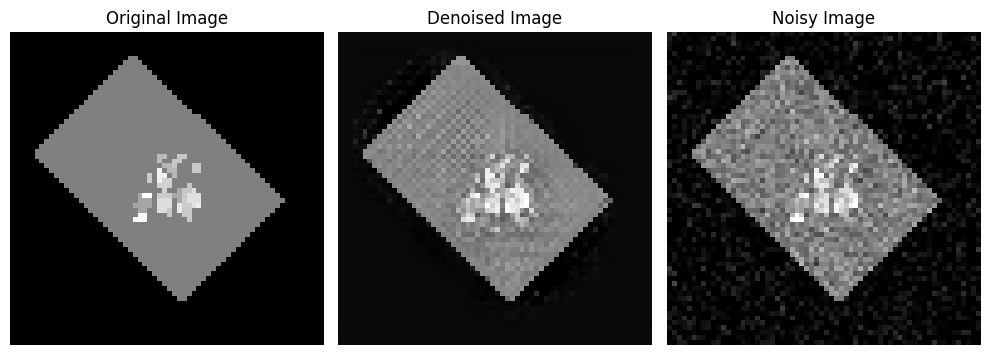

[2023-09-12 23:41:43] Intermediate result: {"iteration": 5200, "loss": 0.00336, "psnr_gt": 27.29291}  (Index 208)
[2023-09-12 23:41:52] Intermediate result: {"iteration": 5225, "loss": 0.00864, "psnr_gt": 21.70989}  (Index 209)
[2023-09-12 23:42:02] Intermediate result: {"iteration": 5250, "loss": 0.00491, "psnr_gt": 26.89961}  (Index 210)
[2023-09-12 23:42:11] Intermediate result: {"iteration": 5275, "loss": 0.00449, "psnr_gt": 28.06717}  (Index 211)
[2023-09-12 23:42:20] Intermediate result: {"iteration": 5300, "loss": 0.00394, "psnr_gt": 28.78426}  (Index 212)
[2023-09-12 23:42:29] Intermediate result: {"iteration": 5325, "loss": 0.00639, "psnr_gt": 25.17216}  (Index 213)
[2023-09-12 23:42:39] Intermediate result: {"iteration": 5350, "loss": 0.00608, "psnr_gt": 25.50714}  (Index 214)
[2023-09-12 23:42:48] Intermediate result: {"iteration": 5375, "loss": 0.00602, "psnr_gt": 25.31426}  (Index 215)


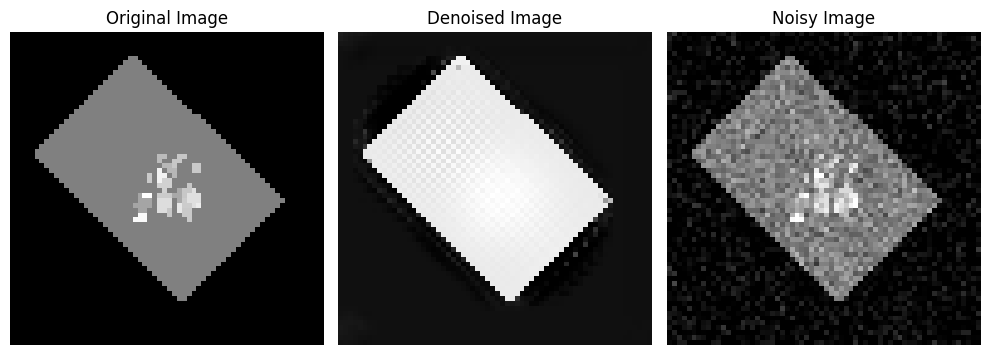

[2023-09-12 23:42:58] Intermediate result: {"iteration": 5400, "loss": 0.00578, "psnr_gt": 25.75631}  (Index 216)


In [2]:


total_iterations = 5000

resolution = 64
noise_type = 'gaussian'
noise_level = .09
img_id = np.random.randint(0, 50)

phantom =       np.load(f'/home/joe/nas-for-dip/phantoms/ground_truth/{resolution}/{img_id}.npy')
phantom_noisy = np.load(f'/home/joe/nas-for-dip/phantoms/{noise_type}/res_{resolution}/nl_{noise_level}/p_{img_id}.npy')

learning_rate = 0.11
buffer_size = 1000
patience = 3000
weight_decay = 5e-7
show_every = 200
report_every = 25

# Create the lightning module
module = SGLDES(
                phantom=phantom, 
                phantom_noisy=phantom_noisy,
                
                learning_rate=learning_rate, # consider .01
                buffer_size=buffer_size,
                patience=patience,
                weight_decay= weight_decay,

                show_every=show_every,
                report_every=report_every,
                HPO=False,
                NAS=True,
                OneShot=True,
                SGLD_regularize=False,
                ES=True,
                )

# Create a PyTorch Lightning trainer
trainer = Trainer(
            max_epochs=total_iterations,
            fast_dev_run=False,
            gpus=1,
            )
            
if not hasattr(trainer, 'optimizer_frequencies'):
    trainer.optimizer_frequencies = []


# Create the lighting object for evaluator
train_loader = DataLoader(SingleImageDataset(phantom_noisy, num_iter=1), batch_size=1)
val_loader = DataLoader(SingleImageDataset(phantom_noisy, num_iter=1), batch_size=1)

lightning = Lightning(lightning_module=module, trainer=trainer, train_dataloaders=train_loader, val_dataloaders=val_loader)


# Select the Search Strategy
# search_strategy = strategy.DARTS()
# search_strategy = strategy.ENAS()
search_strategy = strategy.GumbelDARTS()
# search_strategy = strategy.RandomOneShot()


model_space = UNetSpace(
         C_in=1, 
         C_out=1, 
         depth=4, 
         nodes_per_layer=2, # accept only 1 or 2,
         ops_per_node=4,
         use_attention=True,

        )
# fast_dev_run=False

config = RetiariiExeConfig(execution_engine='oneshot')
experiment = RetiariiExperiment(model_space, evaluator=lightning, strategy=search_strategy)
experiment.run(config)

In [ ]:
experiment.stop()

In [ ]:

exported_arch = experiment.export_top_models(formatter='dict')

exported_arch[0]

In [ ]:
from search_space.unet.unetspaceOS import exportedUNet

exportNet = exportedUNet(exported_arch=exported_arch[0], depth=4, C_in=1, C_out=1)
exportNet.test()

In [ ]:
model_space = UNetSpace(
         C_in=1, 
         C_out=1, 
         depth=4, 
         nodes_per_layer=2, # accept only 1 or 2,
         ops_per_node=1,
         use_attention=False,

        )

model_space.test()